<a href="https://colab.research.google.com/github/gopaljigupta45/Online_Retail_Customer_Segmentation/blob/main/Online_Retail_Customer_Segmentation_Capstone_Project_GOPAL_JI_GUPTA_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u> Project Title : Extraction/identification of major topics & themes discussed in news articles. </u></b>

## <b> Problem Description </b>

### In this project, your task is to identify major customer segments on a transnational data set which contains all the transactions occurring between 01/12/2010 and 09/12/2011 for a UK-based and registered non-store online retail.The company mainly sells unique all-occasion gifts. Many customers of the company are wholesalers.

## <b> Data Description </b>

### <b>Attribute Information: </b>

* ### InvoiceNo: Invoice number. Nominal, a 6-digit integral number uniquely assigned to each transaction. If this code starts with letter 'c', it indicates a cancellation.
* ### StockCode: Product (item) code. Nominal, a 5-digit integral number uniquely assigned to each distinct product.
* ### Description: Product (item) name. Nominal.
* ### Quantity: The quantities of each product (item) per transaction. Numeric.
* ### InvoiceDate: Invice Date and time. Numeric, the day and time when each transaction was generated.
* ### UnitPrice: Unit price. Numeric, Product price per unit in sterling.
* ### CustomerID: Customer number. Nominal, a 5-digit integral number uniquely assigned to each customer.
* ### Country: Country name. Nominal, the name of the country where each customer resides.

### **Loading and Preprocessing Data**

In [6]:
# Importing the libraries that we'll need.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [7]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [8]:
# Loading the data.
df = pd.read_excel('/content/drive/MyDrive/Online Retail Customer Segmentation - GOPAL JI GUPTA/Online Retail.xlsx')

In [9]:
# Checking the data.
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [10]:
df.tail()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France
541908,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,2011-12-09 12:50:00,4.95,12680.0,France


In [11]:
# Checking for shape and getting some information about the data.
print(df.shape)
df.info()

(541909, 8)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [12]:
# getting some descriptive statistics for our numerical data.
df.describe(include='all')

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
count,541909.0,541909,540455,541909.000000,541909,541909.000000,406829.000000,541909
unique,25900.0,4070,4223,NaN,23260,NaN,NaN,38
top,573585.0,85123A,WHITE HANGING HEART T-LIGHT HOLDER,NaN,2011-10-31 14:41:00,NaN,NaN,United Kingdom
freq,1114.0,2313,2369,NaN,1114,NaN,NaN,495478
first,NaN,NaN,NaN,NaN,2010-12-01 08:26:00,NaN,NaN,NaN
last,NaN,NaN,NaN,NaN,2011-12-09 12:50:00,NaN,NaN,NaN
mean,NaN,NaN,NaN,9.552250,NaN,4.611114,15287.690570,NaN
std,NaN,NaN,NaN,218.081158,NaN,96.759853,1713.600303,NaN
min,NaN,NaN,NaN,-80995.000000,NaN,-11062.060000,12346.000000,NaN
25%,NaN,NaN,NaN,1.000000,NaN,1.250000,13953.000000,NaN


In [13]:
# Preserving the data before we start operating in case we need the original data.
online_retail_df = df.copy()

In [14]:
# looking for missing/null values
df.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

**As we can see that there are some null values in description column and quite a lot of null values in our CustomerId column. We need to deal with these null values otherwise they will have an adverse impact on our modelling process.**

In [15]:
# dropping the null values from our data.
df.dropna(inplace=True)

In [16]:
df.shape                    # new shape of the data.

(406829, 8)

In [17]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [18]:
# checking the datatypes of the features in our data.
df.dtypes

InvoiceNo              object
StockCode              object
Description            object
Quantity                int64
InvoiceDate    datetime64[ns]
UnitPrice             float64
CustomerID            float64
Country                object
dtype: object

In [19]:
# now as we can see, that there are some columns that have the datatype object. we can modify them to the proper datatypes.
# changing customer id to and several string columns to str datatype.
df[['CustomerID']] = df[['CustomerID']].astype(int)
df[['InvoiceNo', 'StockCode', 'Description', 'Country']] = df[['InvoiceNo', 'StockCode', 'Description', 'Country']].astype(str)

In [20]:
df.dtypes

InvoiceNo              object
StockCode              object
Description            object
Quantity                int64
InvoiceDate    datetime64[ns]
UnitPrice             float64
CustomerID              int64
Country                object
dtype: object

In [21]:
# checking for duplicate data in our dataframe
df[df.duplicated()]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
517,536409,21866,UNION JACK FLAG LUGGAGE TAG,1,2010-12-01 11:45:00,1.25,17908,United Kingdom
527,536409,22866,HAND WARMER SCOTTY DOG DESIGN,1,2010-12-01 11:45:00,2.10,17908,United Kingdom
537,536409,22900,SET 2 TEA TOWELS I LOVE LONDON,1,2010-12-01 11:45:00,2.95,17908,United Kingdom
539,536409,22111,SCOTTIE DOG HOT WATER BOTTLE,1,2010-12-01 11:45:00,4.95,17908,United Kingdom
555,536412,22327,ROUND SNACK BOXES SET OF 4 SKULLS,1,2010-12-01 11:49:00,2.95,17920,United Kingdom
...,...,...,...,...,...,...,...,...
541675,581538,22068,BLACK PIRATE TREASURE CHEST,1,2011-12-09 11:34:00,0.39,14446,United Kingdom
541689,581538,23318,BOX OF 6 MINI VINTAGE CRACKERS,1,2011-12-09 11:34:00,2.49,14446,United Kingdom
541692,581538,22992,REVOLVER WOODEN RULER,1,2011-12-09 11:34:00,1.95,14446,United Kingdom
541699,581538,22694,WICKER STAR,1,2011-12-09 11:34:00,2.10,14446,United Kingdom


**As we can see from above that there are over 5000 duplicate instances in our data. We will need to drop these instances.**

In [22]:
# Dropping the duplicate values.
df.drop_duplicates(inplace=True)

In [23]:
# checking the shape again.
df.shape

(401604, 8)

In [24]:
# Checking the number of unique values that our features contain.
df.nunique()

InvoiceNo      22190
StockCode       3684
Description     3896
Quantity         436
InvoiceDate    20460
UnitPrice        620
CustomerID      4372
Country           37
dtype: int64

## **EXPLORATORY DATA ANALYSIS**

### **Finding the top 10 countries which have the highest number of orders.**

In [25]:
# Checking the top 10 countries which have the highest number of orders.
df['Country'].value_counts().reset_index().head(10)

,index,Country
0,United Kingdom,356728
1,Germany,9480
2,France,8475
3,EIRE,7475
4,Spain,2528
5,Netherlands,2371
6,Belgium,2069
7,Switzerland,1877
8,Portugal,1471
9,Australia,1258


In [26]:
# plotting the top 10 countries with the most orders using a countplot. First we need to store the above info into another dataframe.
country_df = df['Country'].value_counts().reset_index().head(10)

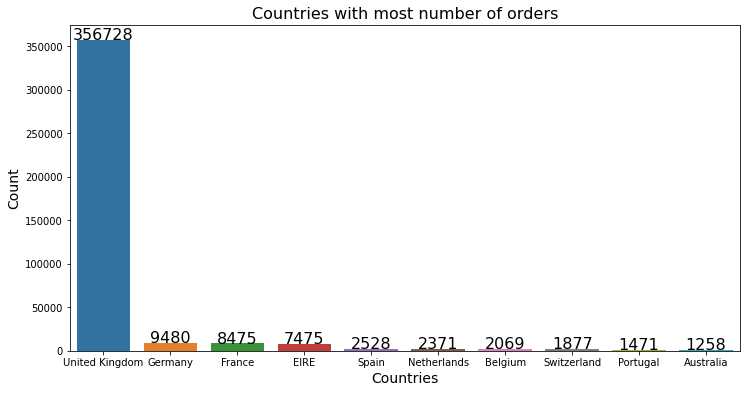

In [27]:
# Barplot of Top 10 countries with most no. of orders placed.
fig, ax = plt.subplots(figsize = (12,6))
graph = sns.barplot(x='index',y='Country',data=country_df.head(10))

# Setting the title and the x and y labels.
plt.title('Countries with most number of orders', fontsize = 16)
plt.xlabel('Countries', fontsize = 14 )
plt.ylabel('Count', fontsize = 14)

# Annotating (Putting the numbers) on top of each bar for better readability.
for p in graph.patches:                               
    height = p.get_height()
    graph.text(p.get_x()+p.get_width()/2, height+500, '{:1.0f}'.format(height),ha = "center", fontsize = 16)

We can clearly see that most of the customers belong to the United Kingdom  which makes sense as it is the country where our business is based out of.

### **Lets find out which are our top 10 best selling products.**

In [28]:
# Lets now see which products are the best sellers.
df['Description'].value_counts().reset_index()

,index,Description
0,WHITE HANGING HEART T-LIGHT HOLDER,2058
1,REGENCY CAKESTAND 3 TIER,1894
2,JUMBO BAG RED RETROSPOT,1659
3,PARTY BUNTING,1409
4,ASSORTED COLOUR BIRD ORNAMENT,1405
...,...,...
3891,PINK/WHITE GLASS DEMI CHOKER,1
3892,I LOVE LONDON MINI RUCKSACK,1
3893,SET 36 COLOURING PENCILS DOILEY,1
3894,SET 12 COLOURING PENCILS DOILEY,1


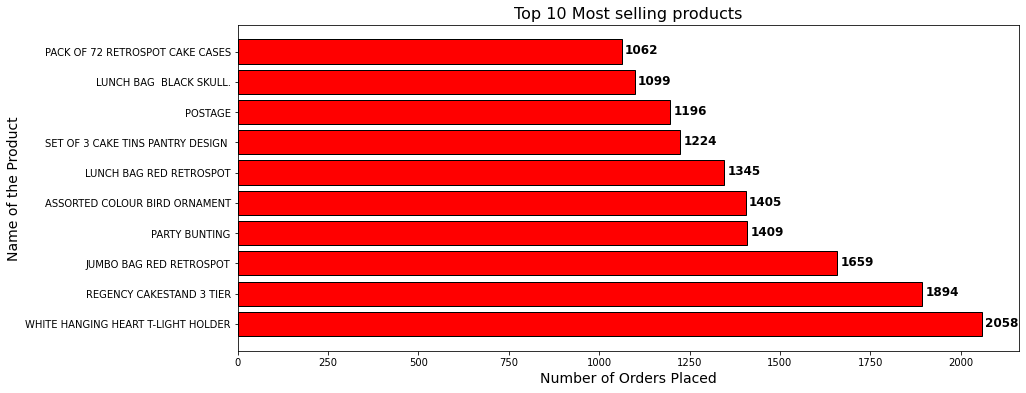

In [29]:
# Lets plot top 10 best selling products. we need to store the counts in another df for plotting this.
product_df = df['Description'].value_counts().reset_index().head(10)

# Now lets plot the top 10 best selling products using a horizontal bar chart.
fig, ax = plt.subplots(figsize = (14,6))
graph = plt.barh(product_df['index'],product_df['Description'], color='r', edgecolor='black')

# Setting the title and the x,y labels.
plt.title('Top 10 Most selling products', fontsize=16)
plt.xlabel('Number of Orders Placed', fontsize=14)
plt.ylabel('Name of the Product', fontsize=14)

# Annotating each bar for better readability.
for p in graph.patches:
    width = p.get_width()
    plt.text(55+p.get_width(), p.get_y()+0.55*p.get_height(), '{:1.0f}'.format(width), ha='center', va='center', weight='bold', fontsize=12)

**From the above plot, we can see our best selling products with the number of orders placed for them.**

### **Now, lets look for which products have the most cancellations.**

In [30]:
# Let us now look at the number of canceled orders in the data. 
# The invoice no. for cancelled orders starts with C. We can use this to retrieve details about cancelled orders.

df[df["InvoiceNo"].str.startswith('C', na=False)]         # here we use boolean indexing to get only those instances whose invoice no. starts with C.

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
141,C536379,D,Discount,-1,2010-12-01 09:41:00,27.50,14527,United Kingdom
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,2010-12-01 09:49:00,4.65,15311,United Kingdom
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,2010-12-01 10:24:00,1.65,17548,United Kingdom
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548,United Kingdom
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548,United Kingdom
...,...,...,...,...,...,...,...,...
540449,C581490,23144,ZINC T-LIGHT HOLDER STARS SMALL,-11,2011-12-09 09:57:00,0.83,14397,United Kingdom
541541,C581499,M,Manual,-1,2011-12-09 10:28:00,224.69,15498,United Kingdom
541715,C581568,21258,VICTORIAN SEWING BOX LARGE,-5,2011-12-09 11:57:00,10.95,15311,United Kingdom
541716,C581569,84978,HANGING HEART JAR T-LIGHT HOLDER,-1,2011-12-09 11:58:00,1.25,17315,United Kingdom


We can clearly see that there are some 8872 instances of cancellation of orders. 

In [31]:
# storing this data in another df for further exploration of cancellations. 
cancellation_df = df[df["InvoiceNo"].str.startswith('C', na=False)]

In [32]:
# lets look at which product has the most number of cancellations.
product_cancellation_data = cancellation_df['Description'].value_counts().reset_index().head(10)
product_cancellation_data

,index,Description
0,REGENCY CAKESTAND 3 TIER,180
1,Manual,175
2,POSTAGE,97
3,JAM MAKING SET WITH JARS,86
4,Discount,77
5,SET OF 3 CAKE TINS PANTRY DESIGN,72
6,STRAWBERRY CERAMIC TRINKET BOX,54
7,ROSES REGENCY TEACUP AND SAUCER,53
8,RECIPE BOX PANTRY YELLOW DESIGN,47
9,JUMBO BAG RED RETROSPOT,44


Text(0.5, 1.0, 'Top 10 Products with most number of cancellations.')

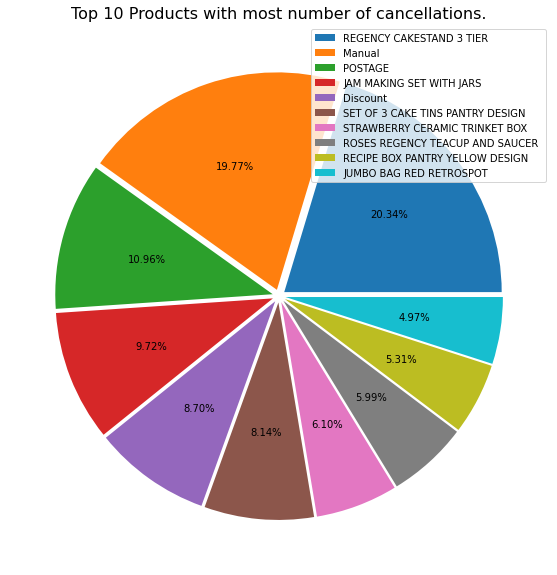

In [76]:
# Plotting the no. of cancellations for products using a pie chart.
plt.figure(figsize=(10,10))
labels=product_cancellation_data['index']                                                    # defining the labels.

explode=[0.03]*len(product_cancellation_data.index)                                          # setting values for exploding a wedge in the chart.
plt.pie(product_cancellation_data['Description'],explode = explode ,autopct='%1.2f%%')       # plotting the pie chart.
plt.legend(labels, loc='best')                                                               # setting the legends.

# Setting the title.
plt.title('Top 10 Products with most number of cancellations.', fontsize=16)

**Above chart depicts the number of cancellations via product. We can clearly see from the above chart that Regency Cakestand Tier 3 and Manual are the most cancelled products.**

### **Now, lets look at the cancellations per country.**

In [34]:
# We can use groupby on the country column and use count method to get cancellations per country.
# also we can use sort values to rank the data in descending order and then apply head method to get top 10 values.
country_cancel_df = cancellation_df.groupby('Country')['InvoiceNo'].count().reset_index().sort_values(by='InvoiceNo', ascending=False).head(10)
country_cancel_df

,Country,InvoiceNo
27,United Kingdom,7501
11,Germany,453
7,EIRE,247
10,France,148
26,USA,112
0,Australia,74
23,Spain,48
14,Italy,45
2,Belgium,38
15,Japan,37


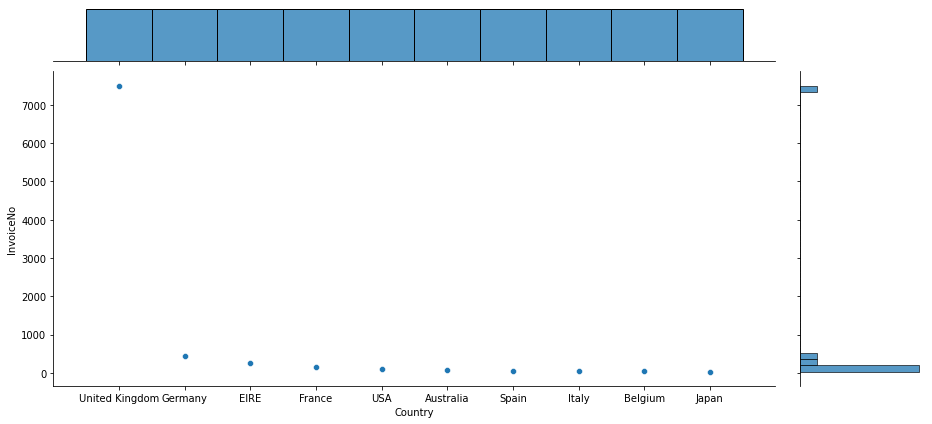

In [35]:
# Plotting the no. of canceled orders per country. we use a jointplot for this.
grid = sns.jointplot(country_cancel_df['Country'],country_cancel_df['InvoiceNo'])

# setting the figwidth figheight to get a non square jointplot to improve readability.
grid.fig.set_figwidth(14)
grid.fig.set_figheight(6)
grid.savefig("filename.png", dpi=300)

**We can clearly see that most cancellations have been done by residents of United Kingdom followed by Germany and EIRE (Republic of Ireland).**

### **Taking a look at the Monthly sales data.**

In [36]:
# To look at the monthly sales data, first we need to create a separate month column out of date.
# Also lets create separate column for day, month, year etc. and also create columns that contain proper names of months and days.

df['Day_num'] = df['InvoiceDate'].dt.day
df['Month_num'] = df['InvoiceDate'].dt.month
df['Year'] = df['InvoiceDate'].dt.year

# creating columns that contain proper months and day names for better understanding.
df['Month']=df['InvoiceDate'].dt.month_name()
df['Day'] = df['InvoiceDate'].dt.day_name()       

# seeing the new data.
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Day_num,Month_num,Year,Month,Day
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,1,12,2010,December,Wednesday
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,1,12,2010,December,Wednesday
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,1,12,2010,December,Wednesday
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,1,12,2010,December,Wednesday
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,1,12,2010,December,Wednesday


In [37]:
# Looking at monthly sales data.
month_df = df['Month'].value_counts().reset_index()
month_df.head()

,index,Month
0,November,64232
1,October,49928
2,December,43736
3,September,40459
4,May,28661


In [38]:
# As we can see from above, the months are not ordered. So lets order them before plotting the above data.
# Initialize an ordered months list.
ordered_months_list = ["January", "February", "March", "April", "May", "June", "July", "August", "September", "October", "November", "December"]

# We can use categorical index function for ordering our data using the above list as a reference point.
month_df.index = pd.CategoricalIndex(month_df['index'],categories=ordered_months_list,ordered=True)
month_df = month_df.sort_index().reset_index(drop=True)
month_df

,index,Month
0,January,21670
1,February,20138
2,March,27516
3,April,22988
4,May,28661
5,June,27576
6,July,27256
7,August,27444
8,September,40459
9,October,49928


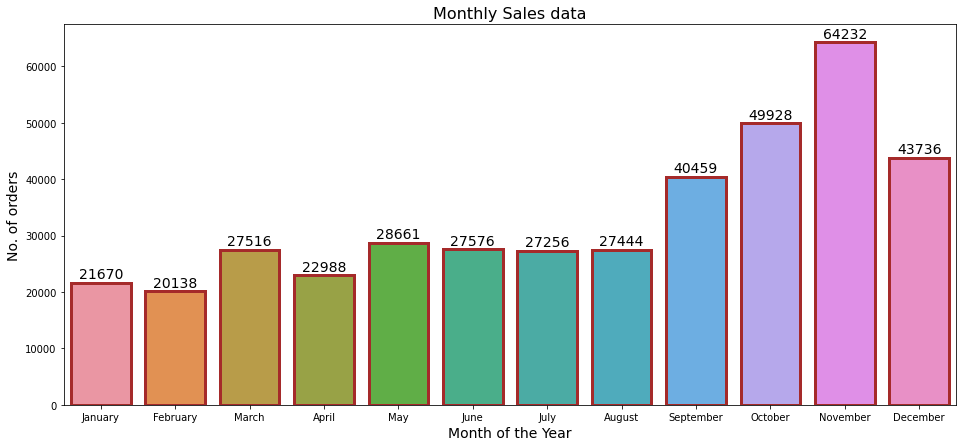

In [78]:
# Plotting the monthly sales data using a barplot.
fig, ax = plt.subplots(figsize = (16,7))
sns.barplot(month_df['index'],month_df['Month'], edgecolor='brown',lw=3)

# Setting the title and the x,y labels.
plt.title('Monthly Sales data', fontsize= 16)
plt.xlabel('Month of the Year', fontsize=14)
plt.ylabel('No. of orders', fontsize=14)

# Annotating the bars with the numbers they represent.
for p in ax.patches:                               
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2, height+800, '{:1.0f}'.format(height),ha = "center", fontsize=14)

**We can clearly say from the above graph that the winter months have the highest sales with November and October having the highest and second highest sales respectively.**

### **Taking a look at day wise order placement trend**

In [43]:
# Taking a look at the daily data.
day_df = pd.DataFrame(df['Day'].value_counts().reset_index())
day_df

,index,Day
0,Thursday,81575
1,Wednesday,69753
2,Tuesday,67376
3,Monday,65715
4,Sunday,61673
5,Friday,55512


In [45]:
# As we can see from above, the months are not ordered. So lets order them before plotting the above data.
# Initialize an ordered days name list.
ordered_day_name_list = ["Sunday", "Monday" , "Tuesday" , "Wednesday" , "Thursday" , "Friday" , "Saturday"]

# We can use categorical index function for ordering our data using the above list as a reference point.
day_df.index = pd.CategoricalIndex(day_df['index'],categories=ordered_day_name_list,ordered=True)
day_df = day_df.sort_index().reset_index(drop=True)
day_df

,index,Day
0,Sunday,61673
1,Monday,65715
2,Tuesday,67376
3,Wednesday,69753
4,Thursday,81575
5,Friday,55512


Text(0, 0.5, 'Number of orders placed')

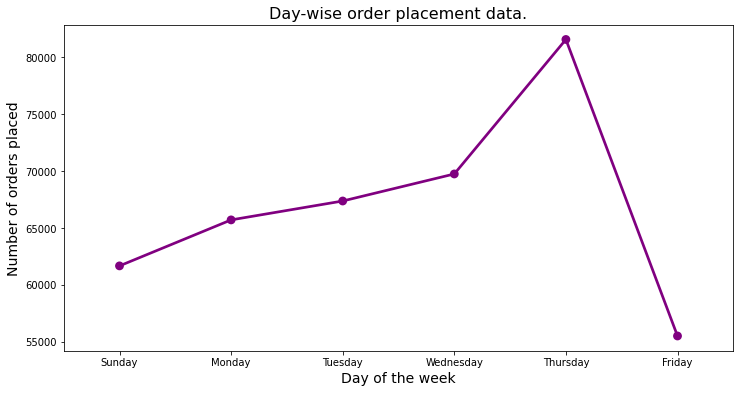

In [77]:
# Plotting this daily sales data.
plt.figure(figsize=(12,6))
sns.pointplot(day_df['index'], day_df['Day'], color='purple')

# Setting the title and x,y labels.
plt.title('Day-wise order placement data.', fontsize=16)
plt.xlabel('Day of the week', fontsize=14)
plt.ylabel('Number of orders placed', fontsize=14)

**We can clearly see from the above graph that most orders were placed on Thursdays and there were no orders placed on Saturdays.**

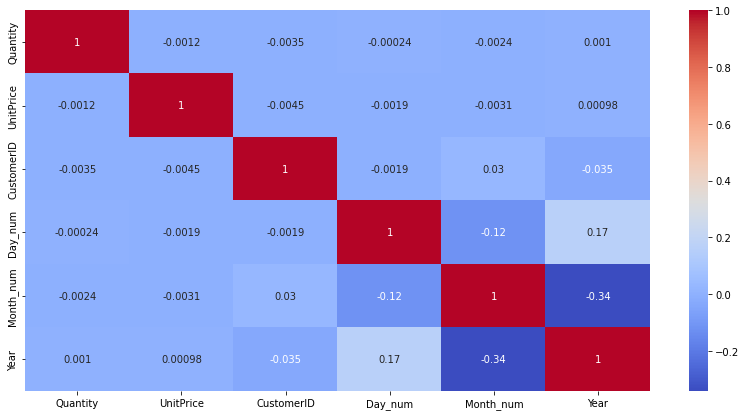

In [41]:
# Checking for correlation in our data.
plt.figure(figsize=(14,7))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')

Before we proceed further with our analysis, we need to consider that we need to drop those instances wherein cancellation happened as they are not that relevant to our analysis.

In [79]:
# Removing those instances that resulted in a calcellation.
df = df[~df['InvoiceNo'].str.contains('C')]

### **Performing a RFM analysis.**

**RFM stands for recency, frequency, monetary value. These parameters are usually used to give us an idea of who our best customers are and customers who we are at risk of losing.**

*   Recency: How recently has the customer made a transaction with us. **Recency = Latest Date - Last Inovice Data**
*   Frequency: How frequent is the customer in ordering/buying some product from us. **Frequency = count of invoice no. of transactions**
*   Monetary: How much does the customer spend on purchasing products from us. **Monetary = Sum of Total Amount for each customer**

RFM is a data-driven customer segmentation technique that allows marketers to take tactical decisions. It empowers marketers to quickly identify and segment users into homogeneous groups and target them with differentiated and personalized marketing strategies. This in turn improves user engagement and retention.In business analytics, we often use this concept to divide customers into different segments, like high-value customers, medium value customers or low-value customers, and similarly many others.

The first step in building an RFM model is to assign Recency, Frequency and Monetary values to each customer. Then we divide the customer list into tiered groups for each of the three dimensions (R, F and M).

RFM factors illustrate these facts:

*   the more recent the purchase, the more responsive the customer is to promotions
*   the more frequently the customer buys, the more engaged and satisfied they are

*   monetary value differentiates heavy spenders from low-value purchasers

In [81]:
# As we can see from the above definition, to do monetary analysis , we need the total amount for each customer.
# Lets create a column amount using quantity and unitprice columns. Amount = Quantity * UnitPrice.
df['Amount'] = df['Quantity'] * df['UnitPrice']

In [82]:
df['InvoiceDate'].max()

Timestamp('2011-12-09 12:50:00')

In [83]:
# Importing the datetime module.
import datetime as dt

# As last invoice date was 2011-12-09, setting Latest date to 2011-12-10 for calculating the number of days from recent purchase
Latest_Date = dt.datetime(2011,12,10)

# Create RFM Modelling scores for each customer
rfm_df=df.groupby('CustomerID').agg({'InvoiceDate': lambda x: (Latest_Date - x.max()).days, 
                                     'InvoiceNo': lambda x: len(x), 'Amount': lambda x: x.sum()})

# Convert Invoice Date into type int
rfm_df['InvoiceDate'] = rfm_df['InvoiceDate'].astype(int)

# Rename column names to Recency, Frequency and Monetary
rfm_df.rename(columns={  'InvoiceDate': 'Recency', 
                         'InvoiceNo': 'Frequency', 
                         'Amount': 'Monetary'}, inplace=True)

rfm_df.reset_index().head()

,CustomerID,Recency,Frequency,Monetary
0,12346,325,1,77183.60
1,12347,2,182,4310.00
2,12348,75,31,1797.24
3,12349,18,73,1757.55
4,12350,310,17,334.40
